In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

C:\Users\YASHASWINI\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\YASHASWINI\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv(r'C:\Users\YASHASWINI\OneDrive\Desktop\mental_health_survey.csv')  
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
# Drop unnecessary columns
df = df.drop(['Timestamp', 'comments'], axis=1, errors='ignore')

# Fill missing values
df['Gender'] = df['Gender'].str.lower()
df['Gender'] = df['Gender'].replace({
    'male':'Male', 'female':'Female', 'm':'Male', 'f':'Female'
})

df.fillna(method='ffill', inplace=True)

C:\Users\YASHASWINI\AppData\Local\Temp\ipykernel_18844\3883370036.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


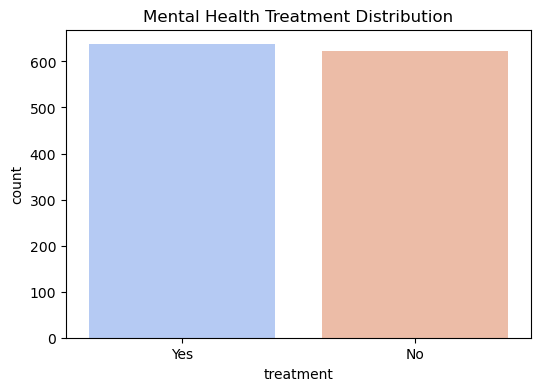

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='treatment', data=df, palette='coolwarm')
plt.title("Mental Health Treatment Distribution")
plt.show()

In [7]:
# Clean gender column
df['Gender'] = df['Gender'].str.lower().str.strip()

# Standardize values
df['Gender'] = df['Gender'].replace({
    'male': 'Male',
    'm': 'Male',
    'male-ish': 'Male',
    'cis male': 'Male',
    'man': 'Male',
    
    'female': 'Female',
    'f': 'Female',
    'woman': 'Female',
    'cis female': 'Female'
})

# Group everything else as 'Other'
df['Gender'] = df['Gender'].apply(lambda x: x if x in ['Male', 'Female'] else 'Other')


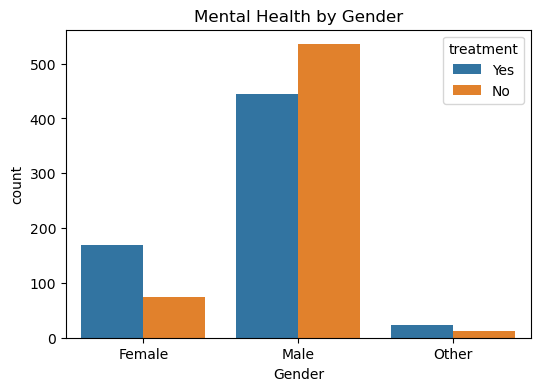

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='treatment', data=df)
plt.title("Mental Health by Gender")
plt.show()

In [9]:
le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [10]:
X = df.drop('treatment', axis=1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7658730158730159

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76       129
           1       0.75      0.79      0.77       123

    accuracy                           0.77       252
   macro avg       0.77      0.77      0.77       252
weighted avg       0.77      0.77      0.77       252



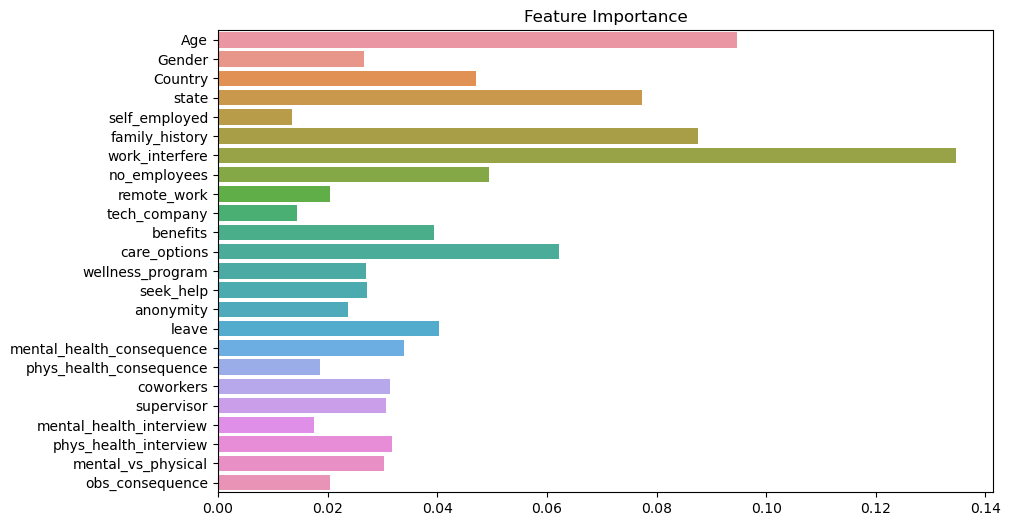

In [13]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()